# MLP(Multi-layer Perceptron) for MNIST using Keras

This program demonstrates training a simple MLP to classify MNIST dataset. The program was created by referring to Keras tutorial(https://keras.io/ko/getting-started/sequential-model-guide/).

The procedure for the development of DL application with given dataset 
consists of the following steps.
1. download and prepare the dataset
2. create the model
4. compile the model
5. train (or fit) the model with prepared dataset
6. evaluate the performance

Before execution the program at Google Colab, check the GPU or TPU at Notebook settings.

### Import TensorFlow

In [8]:
# import tensorflow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
import numpy as np

# tf.test.gpu_device_name()

### Download and prepare the MNIST dataset

MNIST (Modified National Institute of Standards and Technology database) is a dataset of labeled images of handwritten digits from 0 through 9. The dataset has a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In [9]:
# load mnist dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()
# check shapes of images and labels of train and test data
print(train_images.shape, test_images.shape)  

(60000, 28, 28) (10000, 28, 28)


### Verify the data

To verify that the dataset looks correct, let's plot the first 16 images from the training set and display the class name below each image.


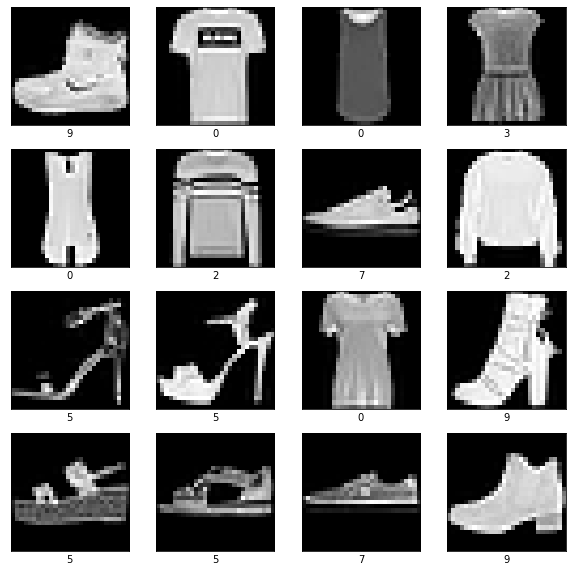

In [10]:
# define class names
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

plt.figure(figsize=(10, 10))
for i in range(16):
     plt.subplot(4, 4, i+1)
     plt.xticks([])
     plt.yticks([])
     plt.grid(False)
     plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
     # plt.imshow(train_images[i], cmap=plt.cm.binary)
     plt.xlabel(class_names[train_labels[i]])
plt.show()

### Prepare Dataset for MLP

In [11]:
# prepare minist dataset for MLP
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))
# check shapes of images of train and test data
print(train_images.shape, test_images.shape)

# normalizes pixel values between 0 and 1 for train and test data
train_images, test_images = train_images/255.0, test_images/255.0

# Convert labels to categorical one-hot encoding
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)
# check shapes of labels of train and test data
print(train_labels.shape, test_labels.shape)
# print(train_labels[1])

(60000, 784) (10000, 784)
(60000, 10) (10000, 10)


### Create model for MLP
First, you will have 784 inputs from an image of size (28x28), flatterning the 2D image to 1D,  then add one or more Dense layers. MNIST has 10 output classes, so you use a final Dense layer with 10 outputs.

In [12]:
model = Sequential()
model.add(Dense(512, input_shape=(784, ), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))


Here's the complete architecture of our model.

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 435,402
Trainable params: 435,402
Non-trainable params: 0
_________________________________________________________________


### Compile and train the model

In [26]:
# sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=False)
bsize = 64
model.compile(loss='categorical_crossentropy',
              optimizer= 'rmsprop',
              metrics=['accuracy'])

#history = model.fit(train_images, train_labels, epochs=10, batch_size=bsize)
history = model.fit(train_images, train_labels, epochs=15, batch_size=bsize,
                    validation_data=(test_images, test_labels))


Epoch 1/15
938/938 [==============================] - 12s 9ms/step - loss: 0.2223 - accuracy: 0.9183 - val_loss: 0.3754 - val_accuracy: 0.8906
Epoch 2/15
938/938 [==============================] - 8s 8ms/step - loss: 0.2262 - accuracy: 0.9175 - val_loss: 0.4189 - val_accuracy: 0.8905
Epoch 3/15
938/938 [==============================] - 8s 8ms/step - loss: 0.2342 - accuracy: 0.9170 - val_loss: 0.3905 - val_accuracy: 0.8898
Epoch 4/15
938/938 [==============================] - 9s 9ms/step - loss: 0.2427 - accuracy: 0.9139 - val_loss: 0.4093 - val_accuracy: 0.8852
Epoch 5/15
938/938 [==============================] - 8s 9ms/step - loss: 0.2458 - accuracy: 0.9151 - val_loss: 0.4088 - val_accuracy: 0.8947
Epoch 6/15
938/938 [==============================] - 8s 9ms/step - loss: 0.2489 - accuracy: 0.9134 - val_loss: 0.4393 - val_accuracy: 0.8861
Epoch 7/15
938/938 [==============================] - 9s 9ms/step - loss: 0.2518 - accuracy: 0.9140 - val_loss: 0.4412 - val_accuracy: 0.8896
Epoch

### Evaluate the model

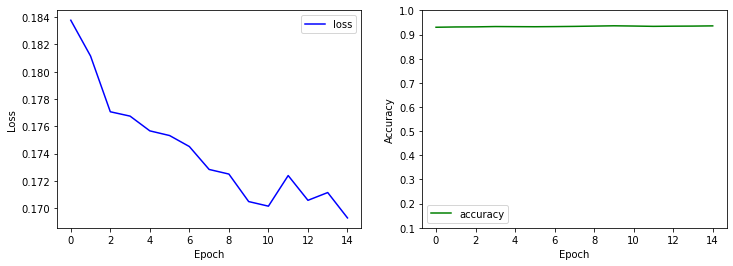

157/157 - 2s - loss: 0.3125 - accuracy: 0.8996


In [24]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.1, 1)
plt.legend()

plt.show()

# test
test_loss, test_acc = model.evaluate(test_images,  test_labels, batch_size=bsize, verbose=2)

In [25]:
print(test_acc)

0.8996000289916992


Our simple MLP has achieved a test accuracy of over 94% with Adam. Very good for a few lines of code! 